1. The iris dataset

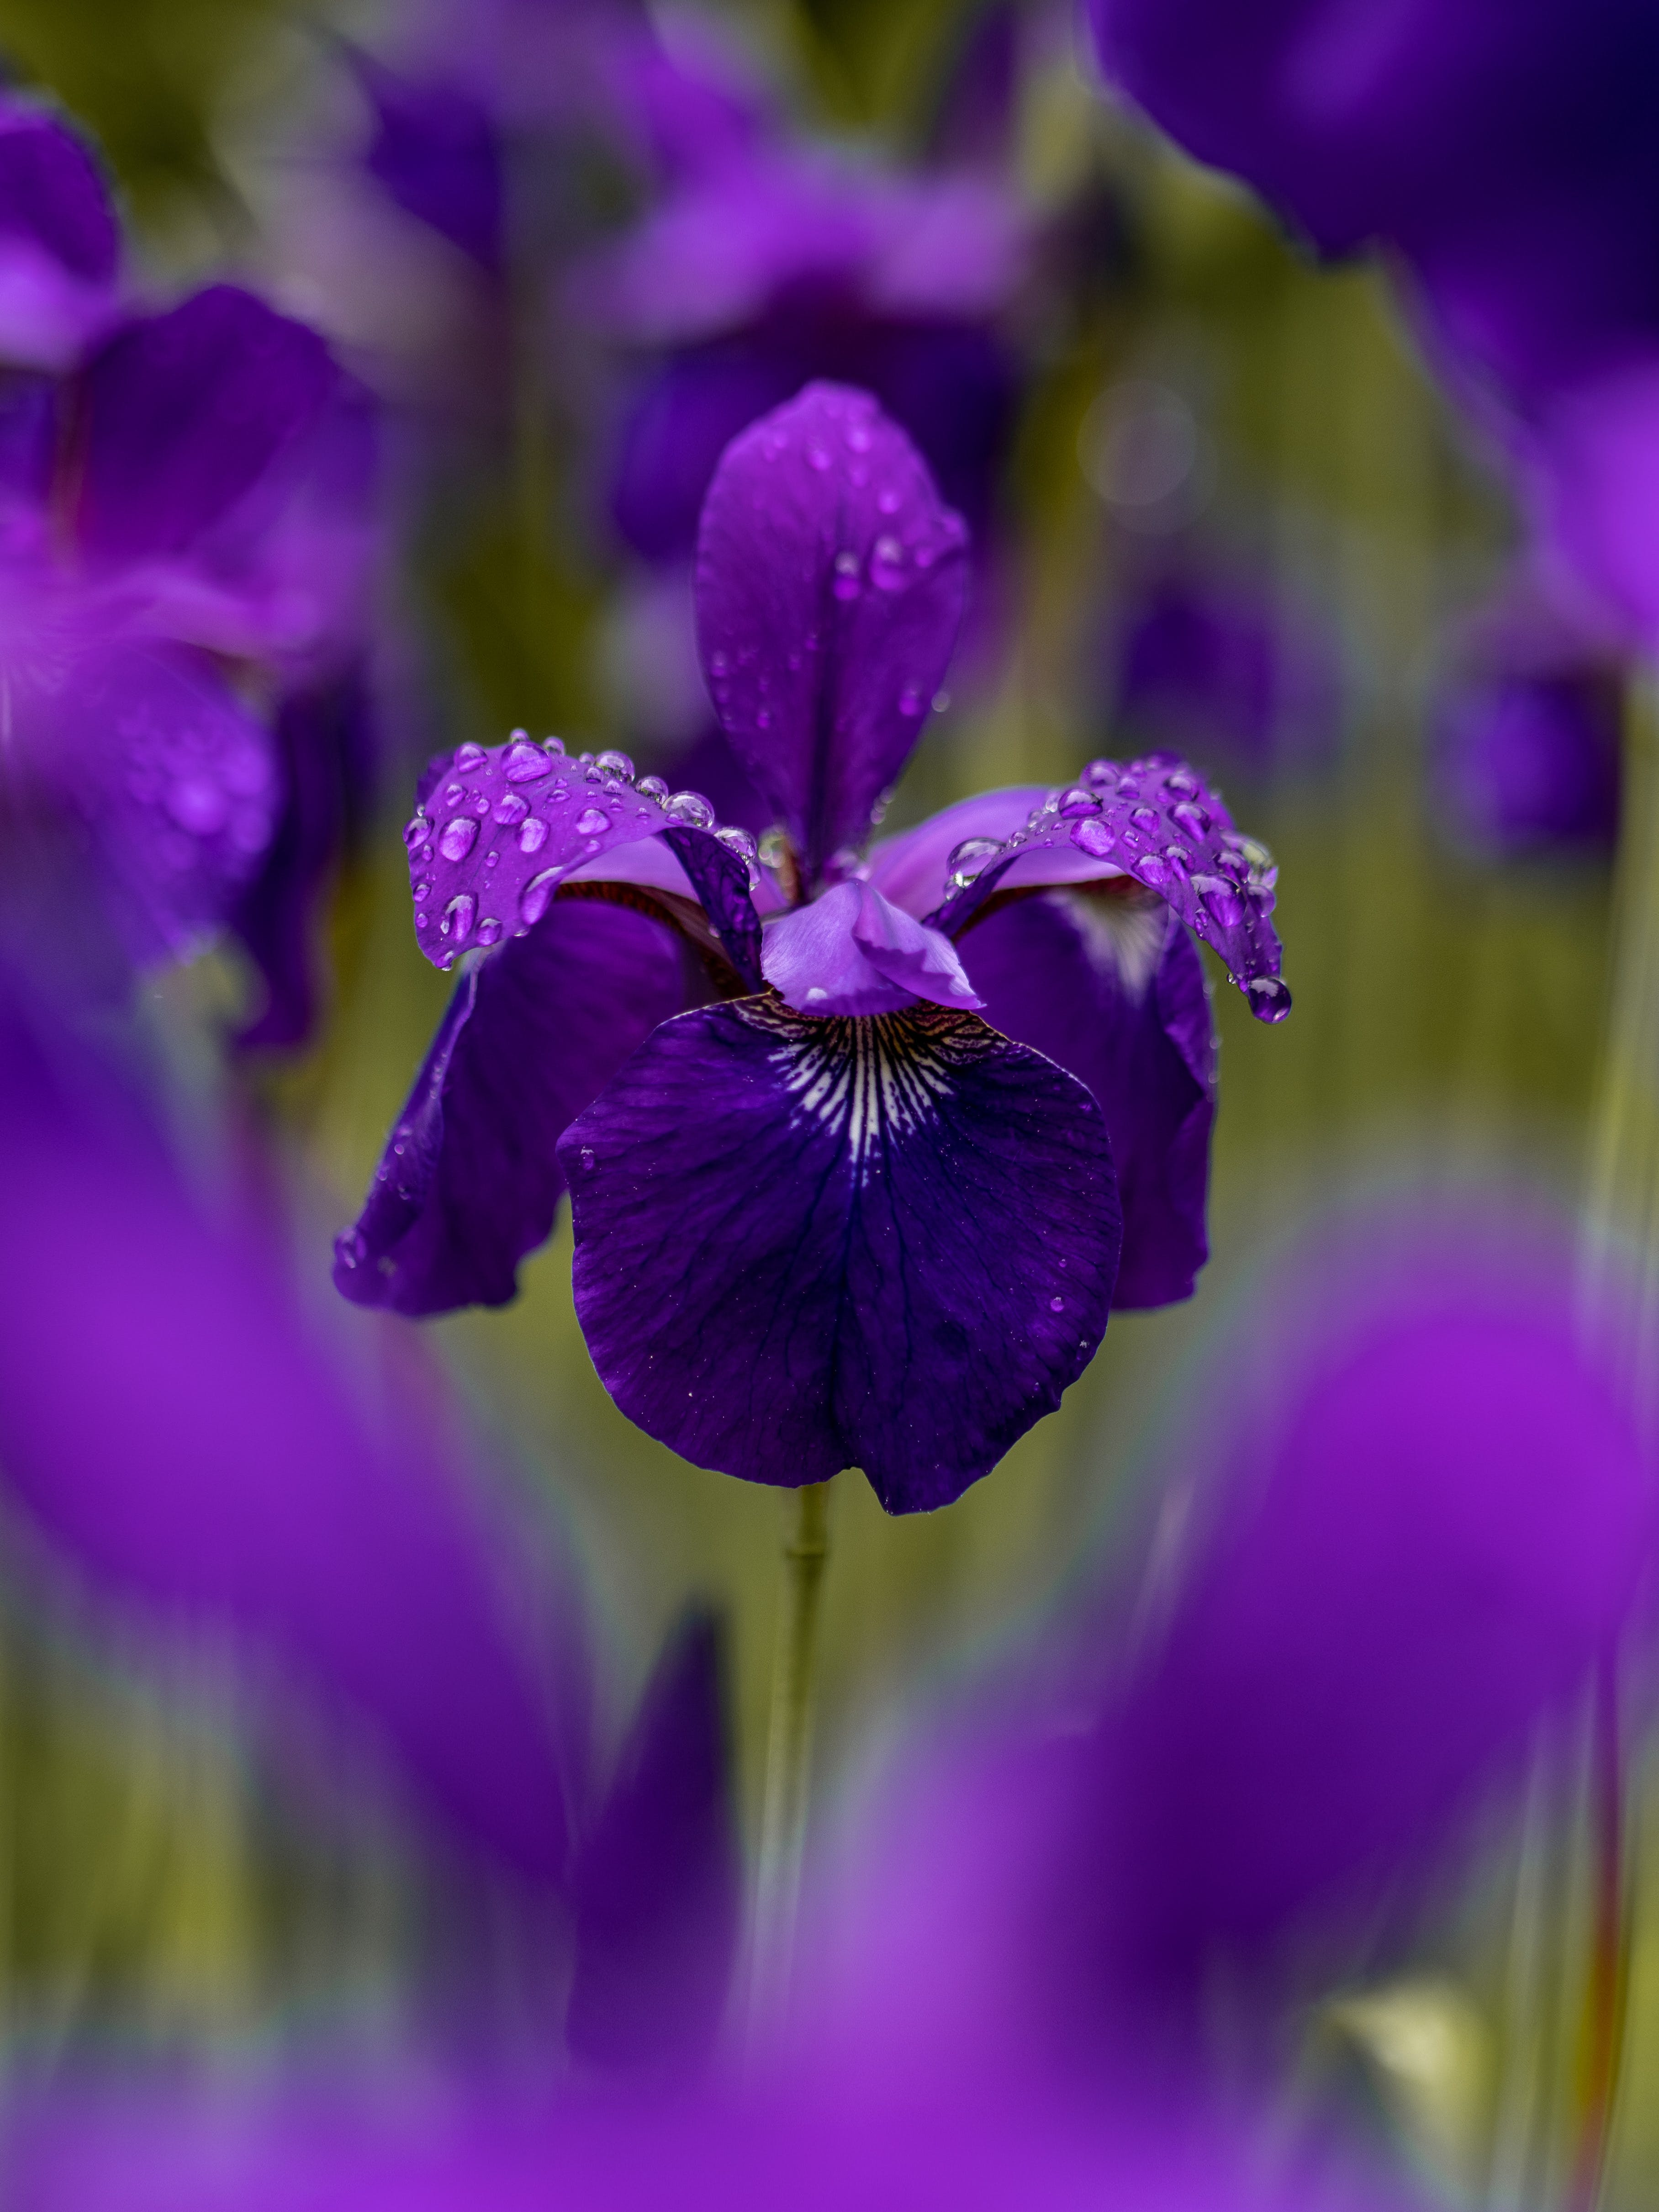

In [1]:
import numpy as np
from tqdm import tqdm

from seaborn import despine
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

from IPython.display import Image

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

Image(filename=r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Iris_data.jpeg' , width = 350)

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
data['data'].shape

(150, 4)

In [7]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

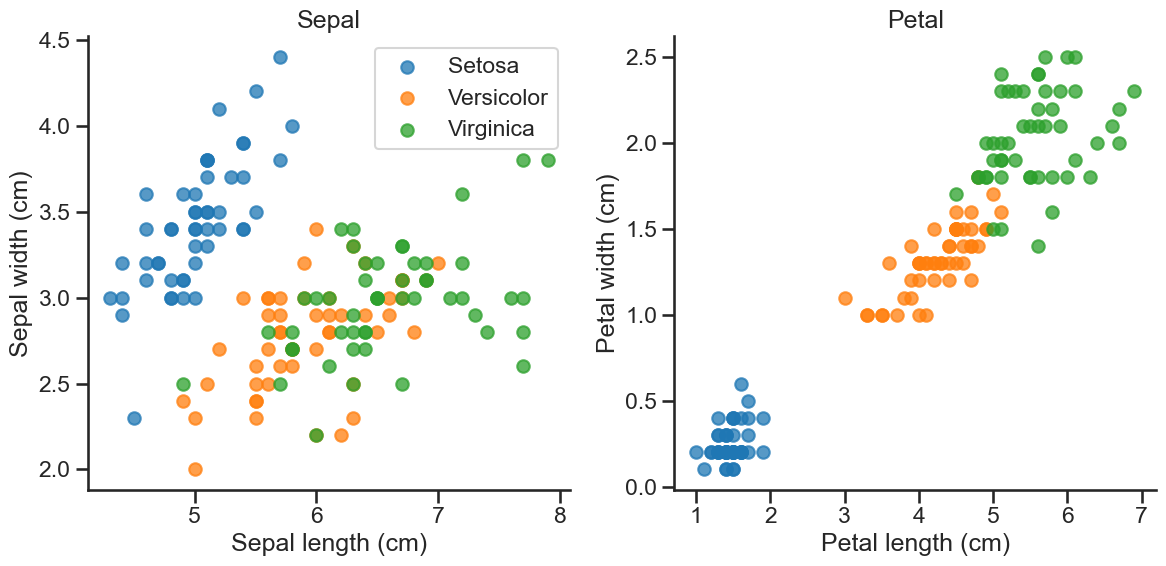

In [8]:
# make fugure
fig, axs = plt.subplots(1,2,figsize=(12,6), dpi=100)
# iterate iris types
for i, iris_type in enumerate(data['target_names']):
    # idx iris type
    idx = data['target']==i
    # plot sepal length / width
    axs[0].scatter(data['data'][idx,0], data['data'][idx,1],
                   color='C{}'.format(i),
                   alpha=0.75,
                   label=iris_type.capitalize())
    # plot petal length / width
    axs[1].scatter(data['data'][idx,2], data['data'][idx,3],
                   color='C{}'.format(i),
                   alpha=0.75,
                   label=iris_type.capitalize())
# add labels
axs[0].set_title('Sepal')  
axs[0].set_xlabel(data['feature_names'][0].capitalize())    
axs[0].set_ylabel(data['feature_names'][1].capitalize()) 
axs[1].set_title('Petal')  
axs[1].set_xlabel(data['feature_names'][2].capitalize())    
axs[1].set_ylabel(data['feature_names'][3].capitalize()) 
axs[0].legend(loc='upper right')
# save
for ax in axs:
    despine(ax=ax)
fig.tight_layout()
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Iris_data.jpeg', dpi=600)

2. Distinguishing setosa and versicolor irises by petal length and witdh:

In [9]:
idx = np.isin(data['target'], (0, 1)) # get rows where target is either 0 or 1
X = data['data'][idx,2:4] # subset the data
y = data['target'][idx] # subset the labels
feature_names = data['feature_names'][2:4]

X.shape

(100, 2)

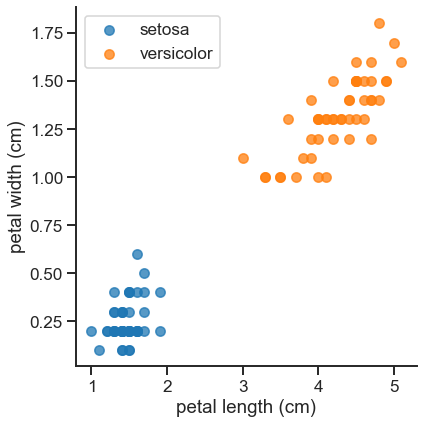

In [10]:
# setup figure
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=75)
# iterate the two target iris types
for cl in np.unique(y):
    # plot
    ax.scatter(x=X[y==cl,0],
               y=X[y==cl,1],
               color='C{}'.format(cl),
               label=data['target_names'][cl],
               alpha=0.75)
# add labels
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.legend()
despine(ax=ax)
fig.tight_layout()
# save figure
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Iris_data.jpeg', dpi=600)

3. The Perceptron

3.1 Inspired by biological neurons:

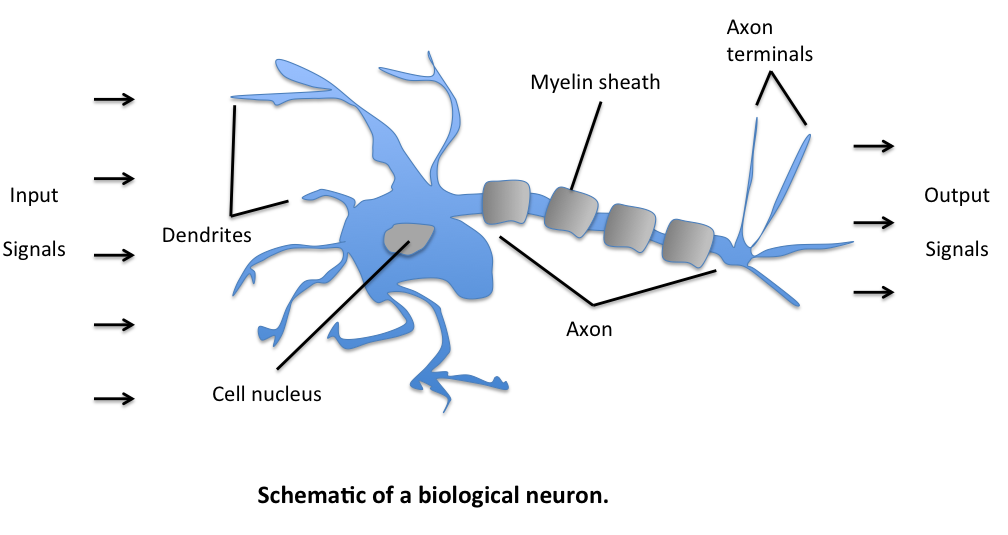

In [11]:
Image(filename=r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\perceptron_neuron.png')

3.2 Implementation

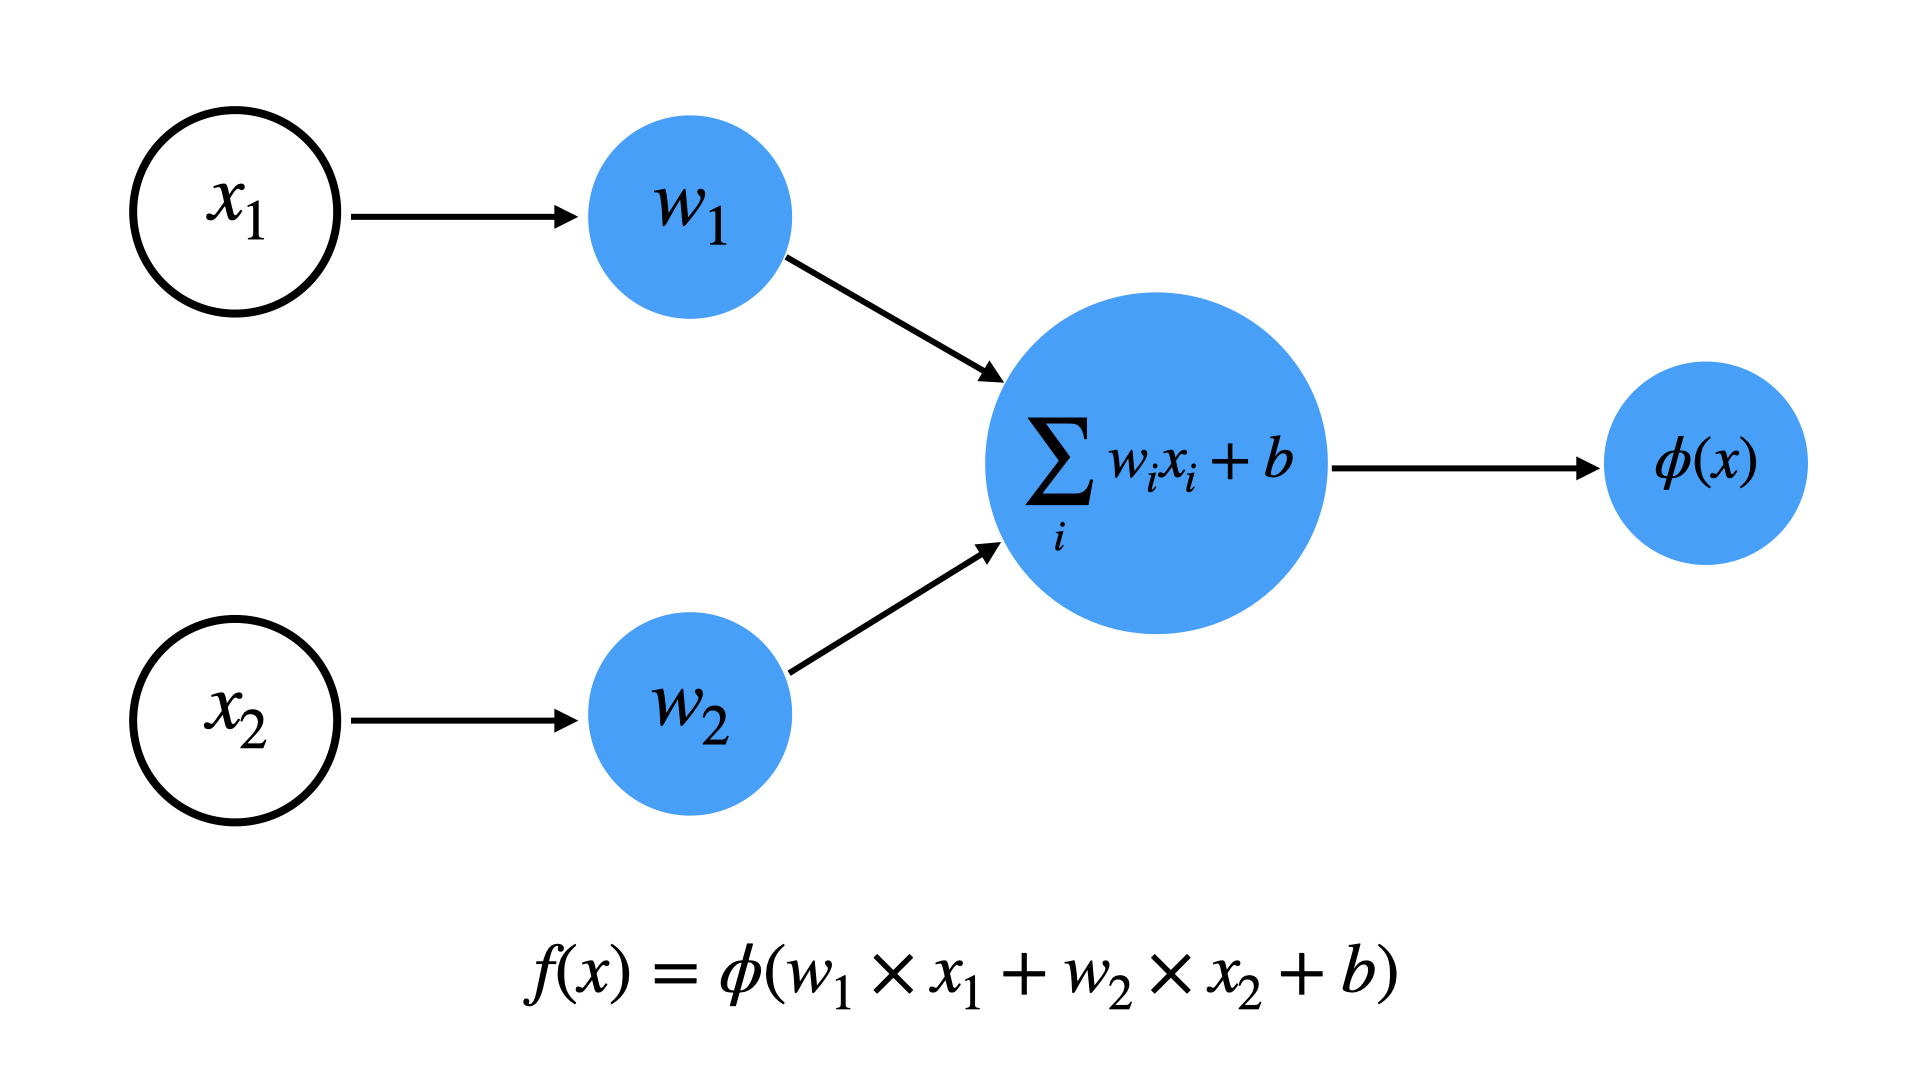

In [12]:
Image(filename=r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Perceptron.png' , width = 800)

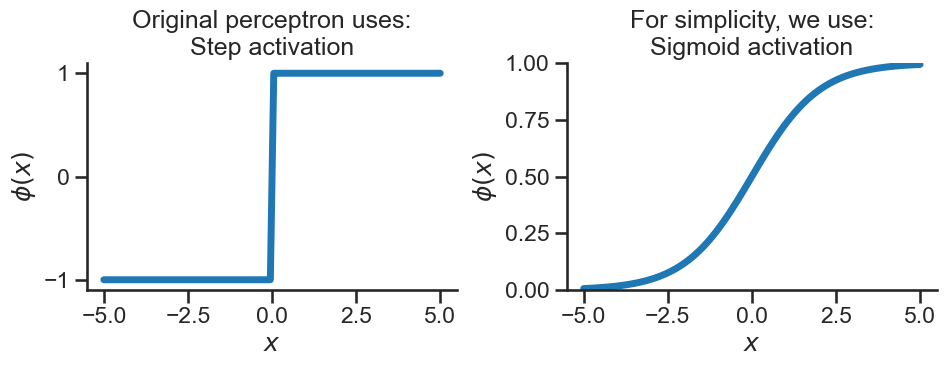

In [13]:
def step(x):
    """step function: 
    outputs 1 if x > 0
    and -1 otherwise"""
    xout = np.ones_like(x)
    xout[x<0] = -1
    return xout

def sigmoid(x):
    """sigmoid function"""
    return 1.0/(1.0 + np.exp(-x)) 
# setup figure
fig, axs = plt.subplots(1,2,figsize=(10,4), dpi=100)

# set input range
x = np.linspace(-5,5,100)

# Step activation
axs[0].set_title('Original perceptron uses:\nStep activation')
axs[0].plot(x, step(x), lw=5)
axs[0].set_ylabel(r'$\phi(x)$')
axs[0].set_xlabel(r'$x$')

# Sigmoid activation
axs[1].set_title('For simplicity, we use:\nSigmoid activation')
axs[1].plot(x, sigmoid(x), lw=5)
axs[1].set_ylabel(r'$\phi(x)$')
axs[1].set_xlabel(r'$x$')
axs[1].set_ylim(0, 1)

# despine
for ax in axs:
    despine(ax=ax)
fig.tight_layout()

# save
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Perceptron-Activation.png', dpi=600)

4. The loss function

C:\Users\mahal\AppData\Local\Temp\ipykernel_8548\840668862.py:8: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(p, -np.log(p), lw=5)
C:\Users\mahal\AppData\Local\Temp\ipykernel_8548\840668862.py:15: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(p, -np.log(1-p), lw=5, color='red')


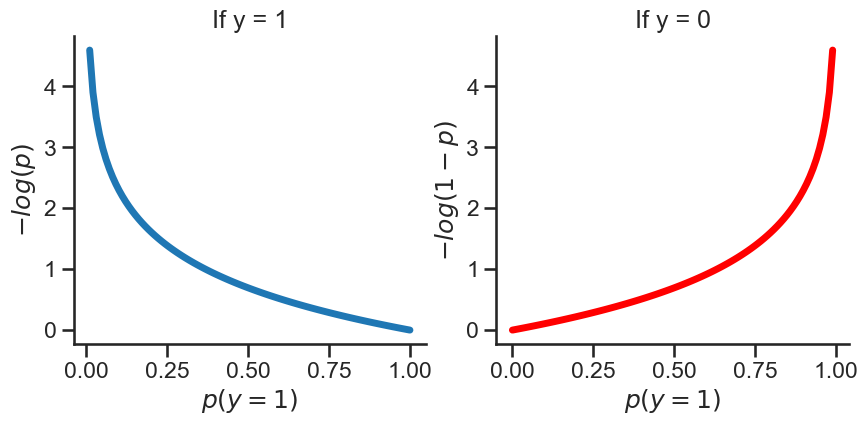

In [14]:
# setup figure
fig, axs = plt.subplots(1,2,figsize=(10,4),dpi=100)

# predicted probability that y = 1
p = np.linspace(0,1,100)

# plot loss if y = 1
axs[0].plot(p, -np.log(p), lw=5)
axs[0].set_title('If y = 1')
axs[0].set_ylabel(r'$-log(p)$')
axs[0].set_xlabel(r'$p(y=1)$')
(despine(ax=axs[0]))

# plot loss if y = 0
axs[1].plot(p, -np.log(1-p), lw=5, color='red')
axs[1].set_title('If y = 0')
axs[1].set_ylabel(r'$-log(1-p)$')
axs[1].set_xlabel(r'$p(y=1)$')
(despine(ax=axs[1]))

# save
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Cross-Entropy-Loss.png', dpi=600)

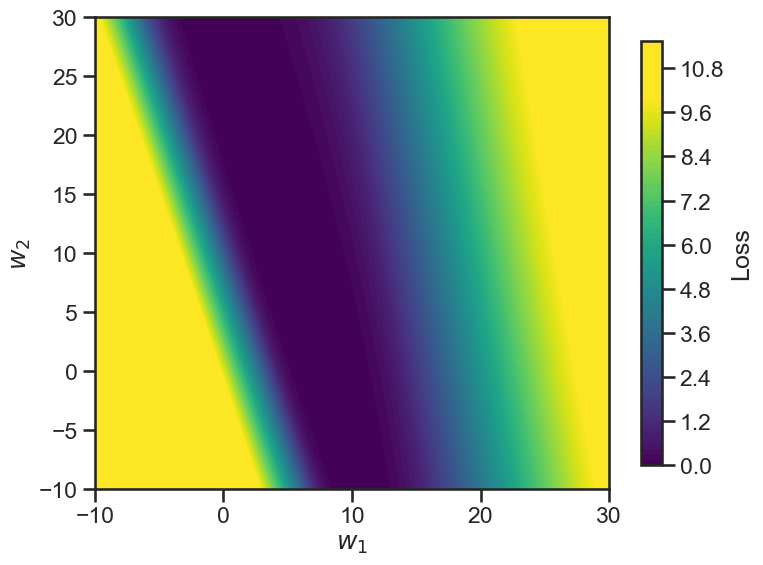

In [15]:
# we define the loss as a Python class:
class cross_entropy_loss:
    def __init__(self):
        self.name = 'cross-entropy'
        
    def loss(self, y, y_pred, zerotol=1e-10):
        """the cross-entropy loss for each 
        data instance
        
        Args:
            y (array): labels for each instance (0 or 1)
            y_pred (array): predicted probabilty that
                each instance belongs to class 1
        """
        loss = -(y * np.log(y_pred + zerotol) + (1 - y) * np.log(1 - y_pred + zerotol))
        return loss
    
    def derivative_loss(self, y, y_pred):
        """the derivative of the cross-entropy loss w.r.t. 
        to sigmoid activation function (we will get to 
        this later)
        
        Args:
            y (array): labels for each instance (0 or 1)
            y_pred (array): predicted probabilty that
                each instance belongs to class 1
        """
        return y_pred - y
# create an instance of our loss function
xeLoss = cross_entropy_loss()

b = -19 # lets set the bias to -19, so that we can plot the two dimensional loss surface 
# (trust me, this is a good value here ^^)

# define the grid of w-values for which we want to compute the loss:
w1grid = np.linspace(-10, 30, 100)
w2grid = np.linspace(-10, 30, 100)
ww1, ww2 = np.meshgrid(w1grid, w2grid) # grid indices for w1 and w2 values

# compute the loss for each point on the grid
zz = np.zeros(ww1.shape)
for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        w = np.array([ww1[i,j], ww2[i,j]])
        y_pred = sigmoid(X.dot(w)+b)
        # we average the loss over all data instances
        zz[i, j] += np.mean(xeLoss.loss(y, y_pred))
# setup figure
fig, ax = plt.subplots(1, 1, figsize=(8,6), dpi=100)
# plot contour
cs = ax.contourf(ww1, ww2, zz, 100, vmax=10, cmap=cm.viridis)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
# label axes
cbar.set_label('Loss')
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
# save figure
fig.tight_layout()
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Perceptron-Loss.png', dpi=600)


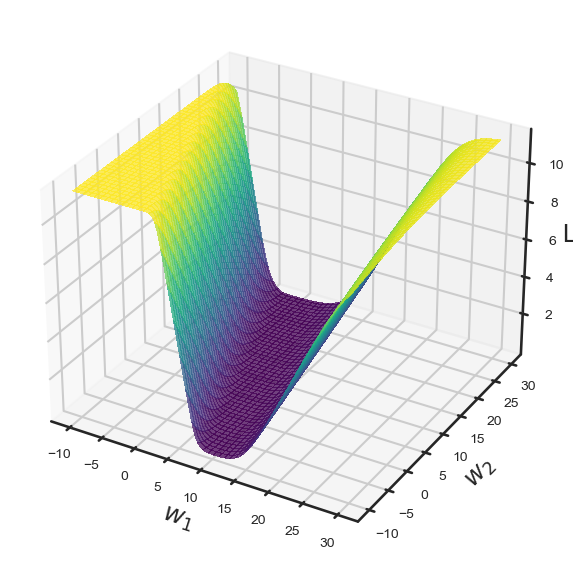

In [16]:
# import 3D functionality
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# setup figure
fig = plt.figure(figsize=(8,6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# plot surface
ax.plot_surface(ww1, ww2, zz, alpha=0.75, cmap=cm.viridis, 
                linewidth=0, antialiased=False, zorder=-99)
# add labels
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
ax.set_zlabel('Loss', labelpad=7) 
ax.tick_params(labelsize=10) # increase labelsize
fig.tight_layout()
# save
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Perceptron-Loss-3D.png', dpi=600)

5. (Stochastic) gradient descent

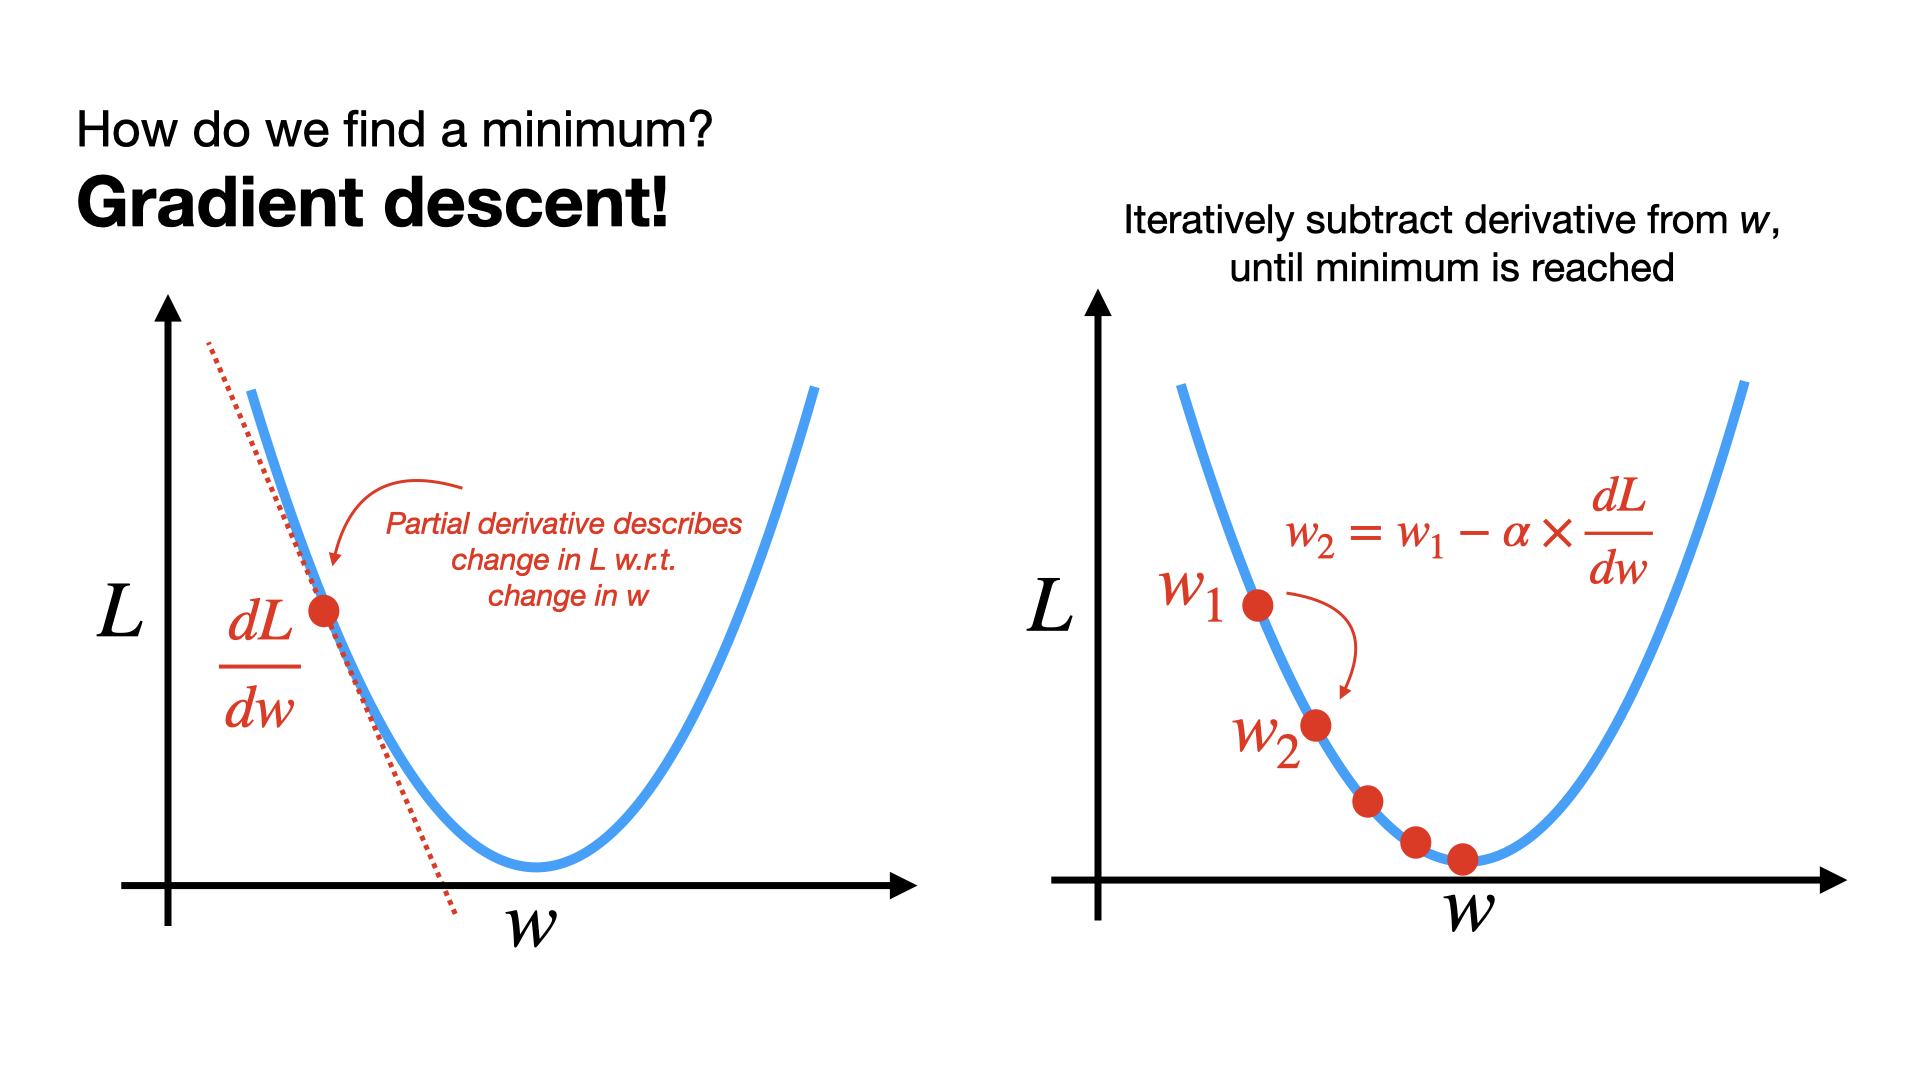

In [17]:
Image(filename=r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Gradient-Descent.png')

6. Our Perceptron implementation

In [18]:
# here we construct a Python class implementing the
# perceptron and gradient descent algorithm:

class Perceptron:
    
    def __init__(self, n_in, activation=sigmoid, loss=cross_entropy_loss, b=None):
        """A simple Perceptron implementation;
        This implementation also contains the
        gradient descent algorithm (see the 
        gradient_descent_step and train 
        functions).
        
        Args:
            n_in (int): number of input features for each instance
            activation (function): activation function of the Perceptron;
                only takes x as input
            loss (function): loss function that we use; 
                (this should be the cross_entropy 
                loss for a sigmoid activation)
            b (float): bias term; if a value is specified, the
                bias term is fixed at this value. if not, 
                the bias will be estimated during training.
        """
        self.n_in = n_in
        self.w = np.random.uniform(-1,1,n_in)
        if b is None:
            self.b = np.random.uniform(-1,1,1)
            self.fit_b = True
        else:
            self.b = b
            self.fit_b = False
        self.activation = activation
        self.loss = loss().loss
        self.derivative_loss = loss().derivative_loss

    def predict(self, x):
        """Predict probability that each 
        instance of x (with shape n_instances x n_features)
        belongs to class 1
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            
        Returns:
            predicted probability for each instance
        """
        self.Z = np.dot(x, self.w) + self.b
        self.A = self.activation(self.Z)
        return self.A
    
    def gradient_descent_step(self, x, y, learning_rate):
        """A single gradient descent step.
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            y (array): label of each instance (0 or 1)
            learning_rate (float): learning rate of the
                gradient descent algorithm
        """
        # compute derivative of loss wrt Z
        dZ = self.derivative_loss(y, self.predict(x))
        dW = np.dot(dZ, x)
        # subtract average derivative from weights
        self.w -= learning_rate * 1.0/dW.shape[0] * dW
        if self.fit_b:
            self.b -= learning_rate * (1.0/x.shape[0] * np.sum(dZ))
            
    def train(self, x, y, batch_size=8, learning_rate=1, n_steps=100):
        """Iteratively train the Perceptron.
        At each iteration, the algorithm will draw 
        a random sample from x and perform a weight 
        update with the partial derivatives that
        are computed from this sample.
        
        Args:
            x (ndarray): input data (n_instances x n_features)
            y (array): label of each instance (0 or 1)
            learning_rate (float): learning rate of the 
                gradient descent algorithm
            n_steps (int): number of gradient descent 
                iterations to perform during training
        """
        self.training_w = np.zeros((n_steps, self.n_in+1))
        self.training_loss = np.zeros(n_steps)
        for s in tqdm(range(n_steps)):
            # draw a random batch
            batch_idx = np.random.choice(x.shape[0], batch_size, replace=False)
            # compute and store mean loss
            self.training_loss[s] = np.mean(self.loss(y[batch_idx], self.predict(X[batch_idx])))
            # store current weights
            self.training_w[s,:self.n_in] = self.w
            self.training_w[s,-1] = self.b
            # perform a gradient descent step
            self.gradient_descent_step(X[batch_idx], y[batch_idx], learning_rate)

7. Applying our implementation

In [19]:
# set a random seed
np.random.seed(4123)

# create instance of our Perceptron
perceptron = Perceptron(n_in=2, b=-19) # n_in: number of input features that our Perceptron expects 
# we set our bias value to -19, as previously discussed

# gradient descent settings
n_steps = 35000 # number of gradient descent iterations (or steps)
batch_size = 32 # number of random samples that we draw at each iteration 

# create containers to store the loss and weight values at each step
training_loss = np.zeros(n_steps)
training_w = np.zeros((n_steps+1,2))
training_w[0] = np.array(perceptron.w) # store randomly initialized weights

# manually iterate the gradient descent steps
for s in tqdm(range(n_steps)):
    # lets draw a random batch
    batch_idx = np.random.choice(X.shape[0], batch_size, replace=False)
    # and compute the loss for our random sample
    training_loss[s] = np.mean(perceptron.loss(y[batch_idx], perceptron.predict(X[batch_idx])))
    # we also update the weights in a gradient descent step 
    # (for details, see the perceptron implementation above):
    perceptron.gradient_descent_step(x=X[batch_idx], y=y[batch_idx], learning_rate=0.5)
    # and store the updated weights
    training_w[s+1] = np.array(perceptron.w)

100%|██████████| 35000/35000 [00:02<00:00, 15283.26it/s]


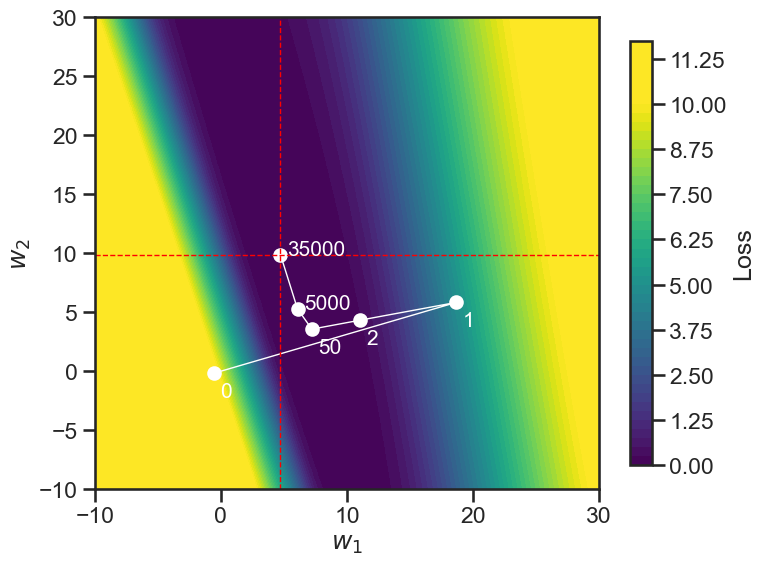

In [20]:
# setup figure
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# plot contour
cs = ax.contourf(ww1, ww2, zz, 50, vmax=10, cmap=cm.viridis)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
# plot gradient descent trajectory
steps = np.array([0,1,2,50,5000,35000])
ax.scatter(training_w[steps,0], training_w[steps,1], color='white')
ax.plot(training_w[steps,0], training_w[steps,1], color='white', lw=1)
for s in steps:
    if s < 100:
        ax.text(training_w[s,0]+0.5, training_w[s,1]-2, s, color='white', fontsize=15)
    else:
        ax.text(training_w[s,0]+0.5, training_w[s,1], s, color='white', fontsize=15)
# mark final weight values
ax.axvline(training_w[s,0], color='red', lw=1, ls='--')
ax.axhline(training_w[s,1], color='red', lw=1, ls='--')
# label axes
cbar.set_label('Loss')
ax.set_xlabel(r"$w_1$")
ax.set_ylabel(r"$w_2$")
# save figure
fig.tight_layout()
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Perceptron-Loss-Gradinet-Descent-Path.png', dpi=600)

8. The learned decision function

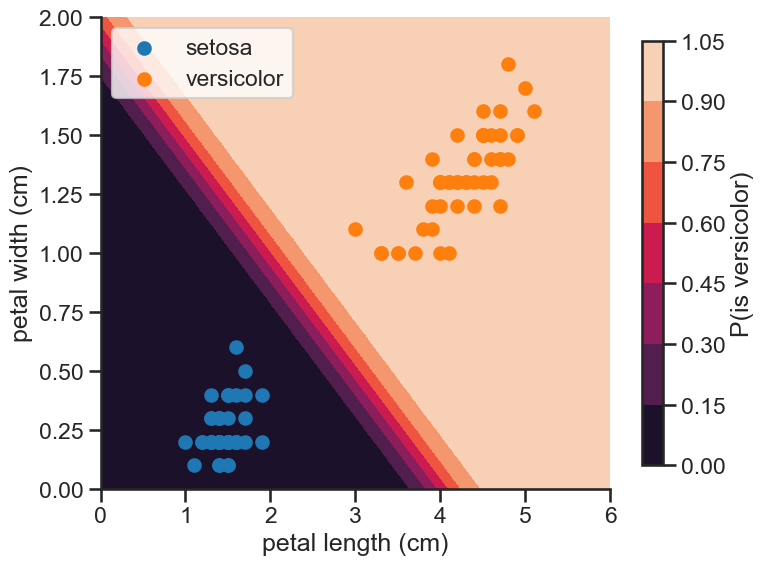

In [21]:
# define a grid of x1 and x2 values for 
# which we want to predict the probability
# that each data point belongs to class 1
x1grid = np.linspace(0, 6, 50)
x2grid = np.linspace(0, 2, 50)
# create all of the rows and columns of the grid
xx1, xx2 = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
x1, x2 = xx1.flatten(), xx2.flatten()
x1, x2 = x1.reshape((-1, 1)), x2.reshape((-1, 1))
# horizontal stack vectors to create x1, x2 input for the model
grid = np.hstack((x1, x2))
# predict probability that each point 
# of the grid belongs to class 1
zz = perceptron.predict(grid).reshape(xx1.shape)
# setup figure
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# plot predicted probabilities
cs = ax.contourf(xx1, xx2, zz)
cbar = fig.colorbar(cs, ax=ax, shrink=0.9)
cbar.set_label('P(is {})'.format(data['target_names'][1]))
# add scatter markers for instances of each iris type
for cl in np.unique(y):
    idx = y==cl
    ax.scatter(x=X[idx,0],
               y=X[idx,1],
               color='C{}'.format(cl),
               label=data['target_names'][cl],
               alpha=1)
# add labels
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.legend()
despine(ax=ax)
# save figure
fig.tight_layout()
fig.savefig(r'C:\Users\mahal\OneDrive\Desktop\Py_programs\Deeplearningbasics\Perceptron_gradient_decent_images\Perceptron-Decision-Function.png', dpi=600)

In [1]:
# we import a small helper function for plotting for this exercise:
from plotting import plot_gradient_descent_path

# set random seed
np.random.seed(4123)



# ---------------
# Your values go here:

n_steps = 4000 # number of gradient descent steps
batch_size = 100 # number of random samples drawn at each iteration (needs to be < 101)
learning_rate = 0.1 # try values between 0.001 and 10

# ---------------



# initialize Perceptron
perceptron = Perceptron(n_in=2) # this time we do not fixate the bias, but learn it also!
# train perceptron
perceptron.train(x=X, y=y,
                 n_steps=n_steps+1,
                 batch_size=batch_size,
                 learning_rate=learning_rate)
print('Your final loss is: {}'.format(perceptron.training_loss[-1]))


# plot gradient descent path
fig, ax = plot_gradient_descent_path(perceptron, X, y)

ModuleNotFoundError: No module named 'helpers.plotting'; 'helpers' is not a package